In [2]:
!pip install yfinance
!pip install yahoofinancials

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import yahoofinancials as YahooFinancials
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
aapl_df = yf.download('AAPL', period="2y")
goog_df = yf.download('GOOG', period="2y")
msft_df = yf.download('MSFT', period="2y")
amzn_df = yf.download('AMZN', period="2y")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
company_dataframes = {
    'AAPL': aapl_df,
    'GOOG': goog_df,
    'AMZN': amzn_df,
    'MSFT': msft_df
}

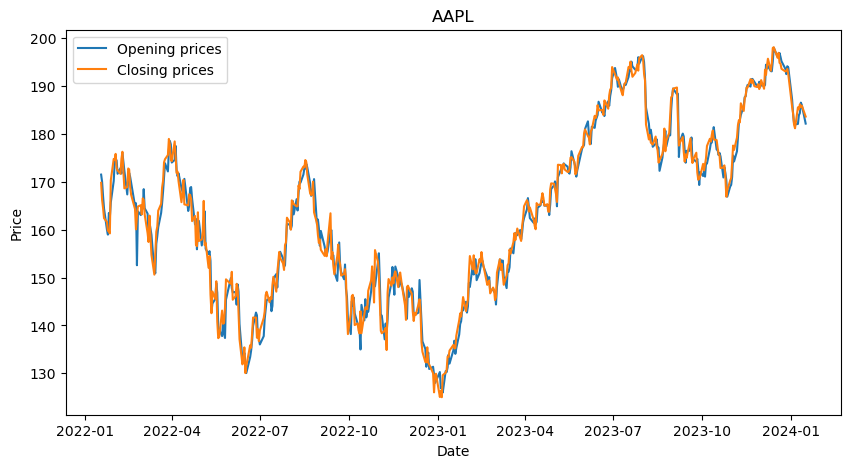

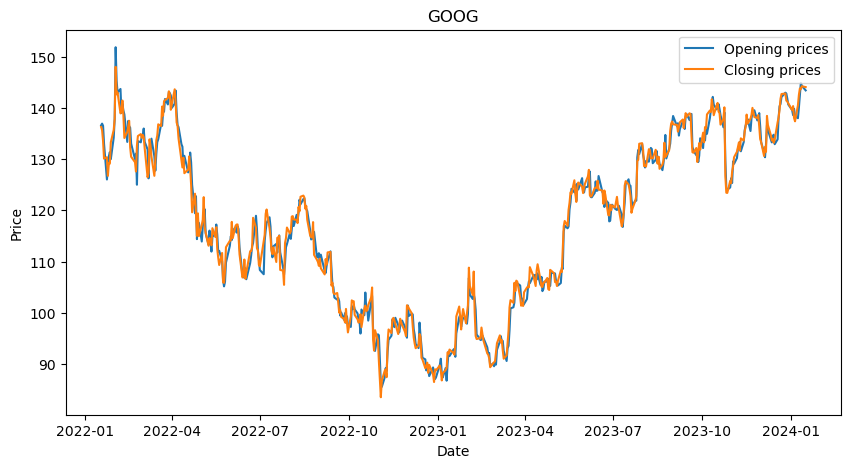

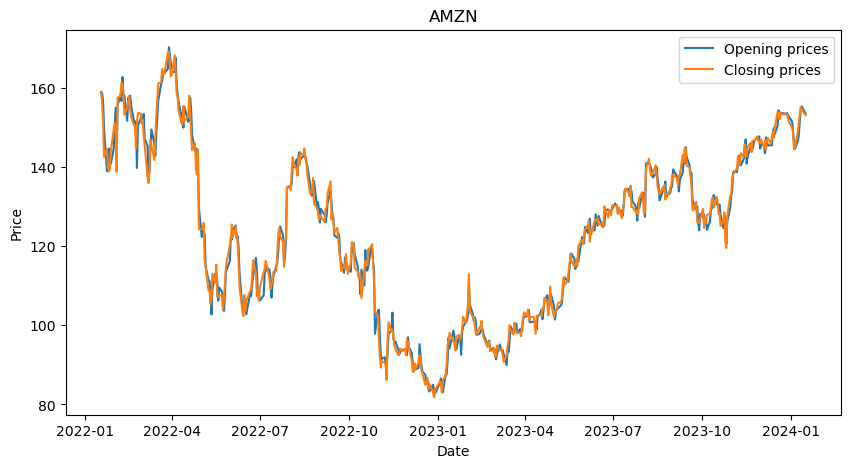

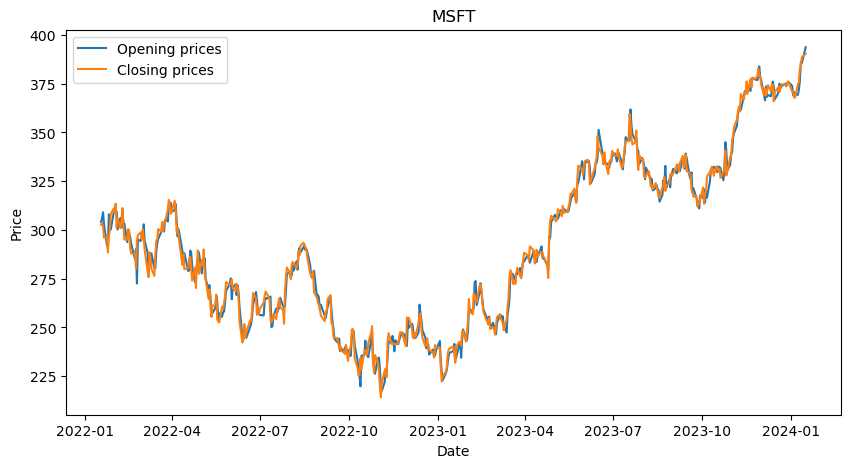

In [12]:
for company, df in company_dataframes.items():
    plt.figure(figsize=(10, 5))

    plt.plot(df['Open'], label='Opening prices')
    plt.plot(df['Close'], label='Closing prices')


    plt.title(f'{company}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    plt.show()

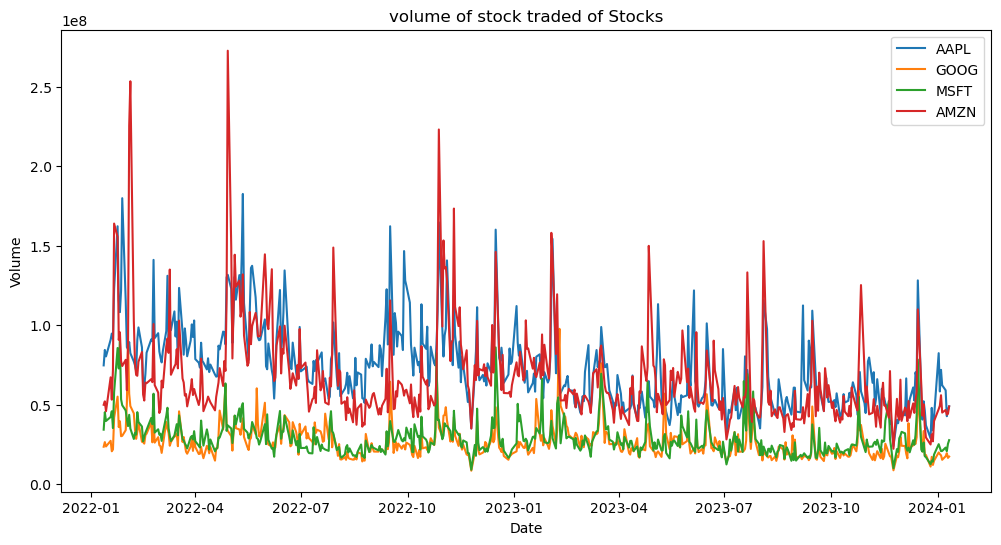

In [20]:
# Plotting volume of sales prices
plt.figure(figsize=(12, 6))

plt.plot(aapl_df['Volume'], label='AAPL')
plt.plot(goog_df['Volume'], label='GOOG')
plt.plot(msft_df['Volume'], label='MSFT')
plt.plot(amzn_df['Volume'], label='AMZN')

plt.title('volume of stock traded of Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.show()

In [21]:
for company, df in company_dataframes.items():
    df['MA_20'] = df['Close'].rolling(window=20).mean()

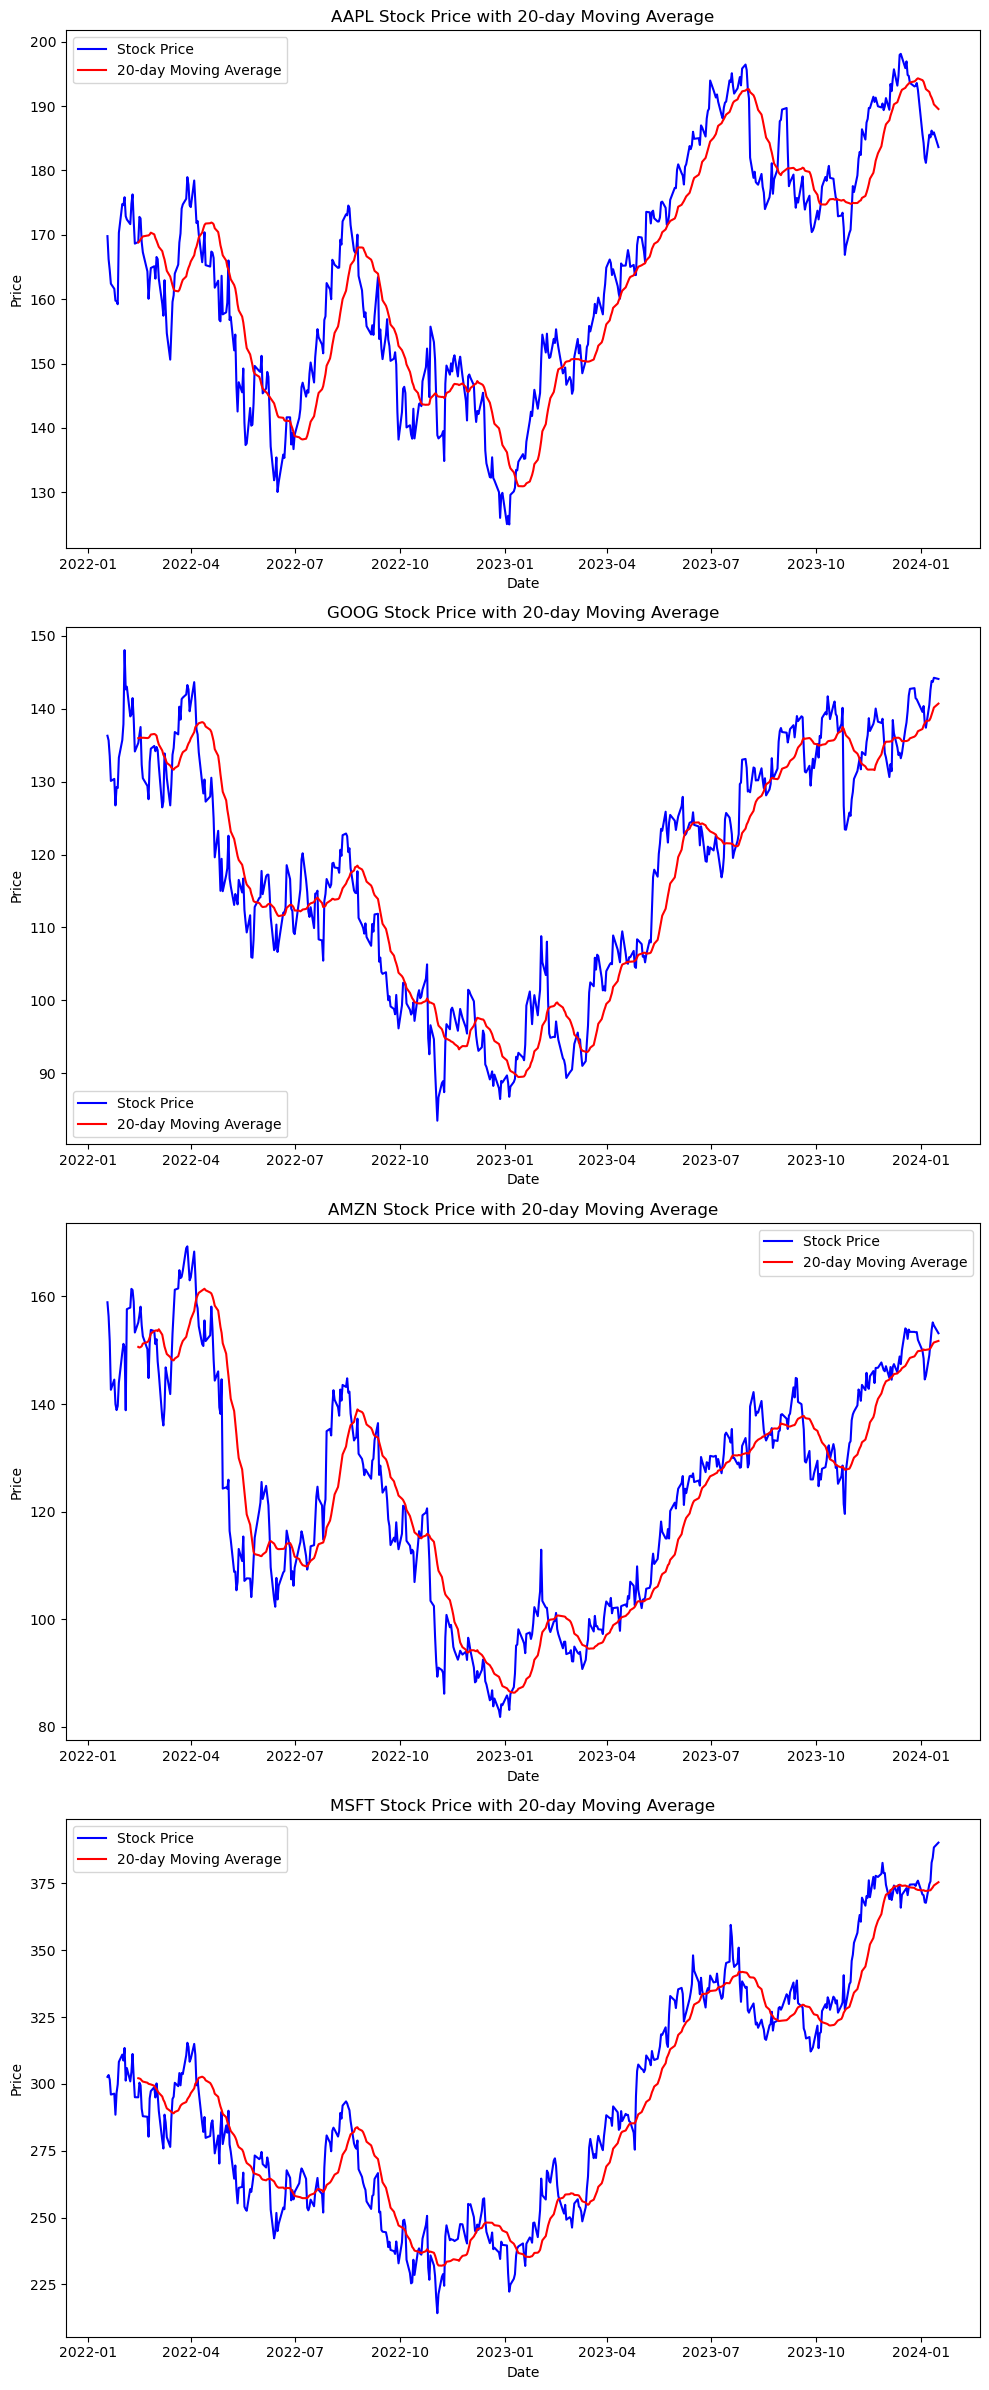

In [22]:
# Create a figure with subplots
fig, axes = plt.subplots(len(company_dataframes), 1, figsize=(10, 6 * len(company_dataframes)))

# Iterate over companies and their respective DataFrames
for i, (company, df) in enumerate(company_dataframes.items()):
    # Plotting stock prices
    axes[i].plot(df['Close'], label='Stock Price', color='blue')

    # Plotting 20-day moving average
    axes[i].plot(df['MA_20'], label='20-day Moving Average', color='red')

    # Adding labels and title for each subplot
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'{company} Stock Price with 20-day Moving Average')
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [39]:
for company, df in company_dataframes.items():
    df['Daily_Return'] = df['Adj Close'].pct_change()


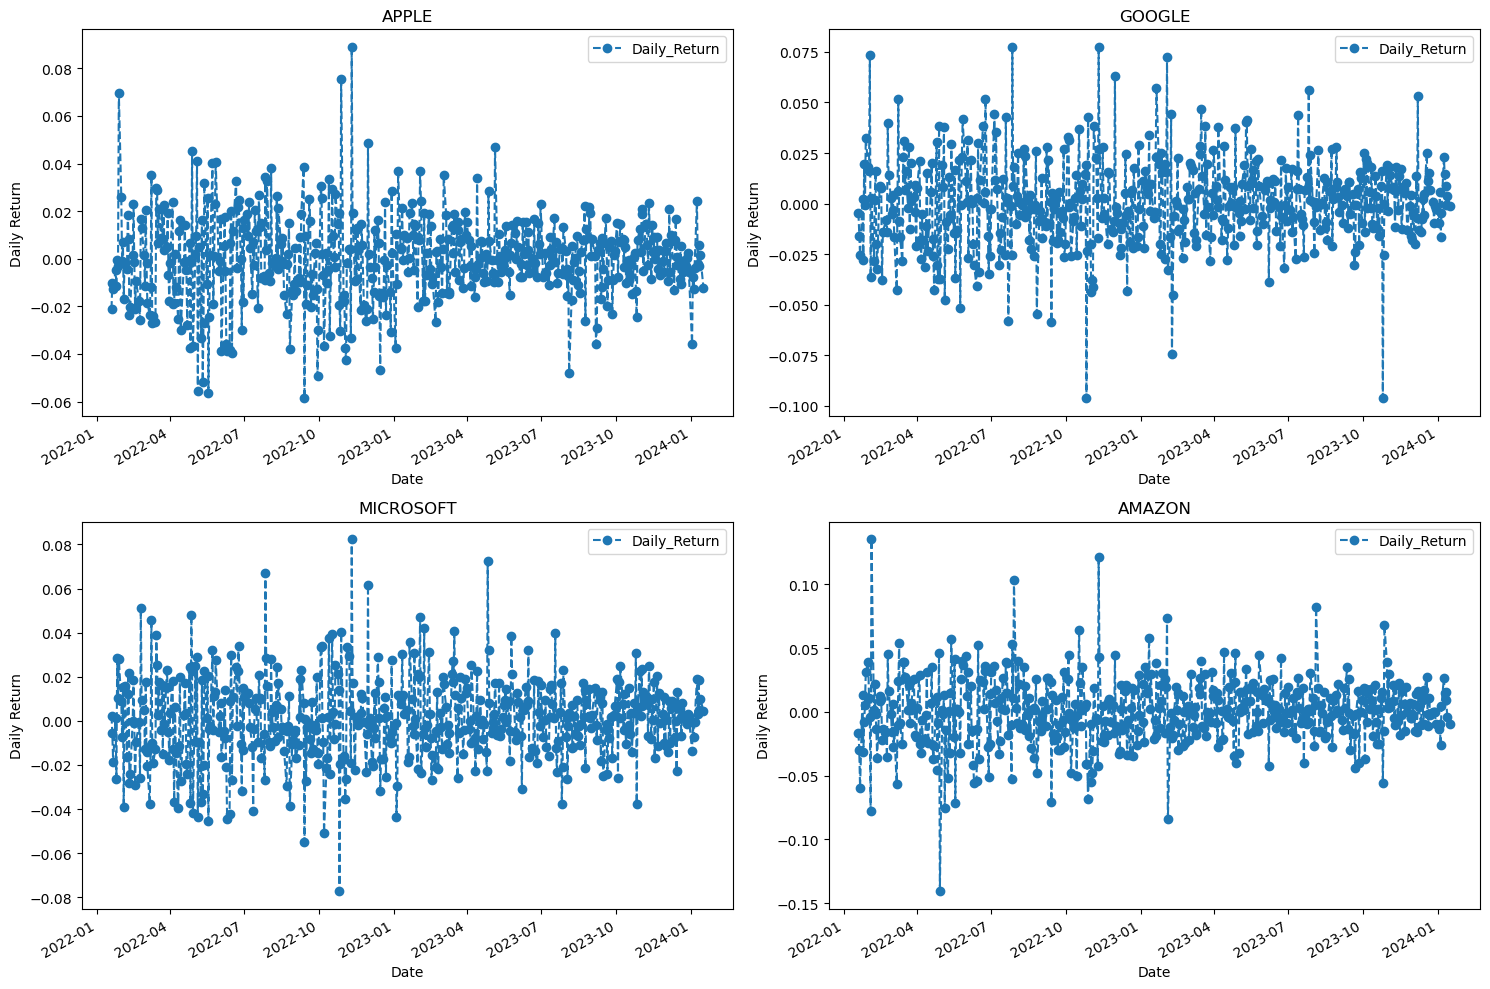

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

aapl_df['Daily_Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Daily Return')

goog_df['Daily_Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('GOOGLE')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Daily Return')

msft_df['Daily_Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('MICROSOFT')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Daily Return')

amzn_df['Daily_Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Daily Return')

fig.tight_layout()

# Display the plots
plt.show()



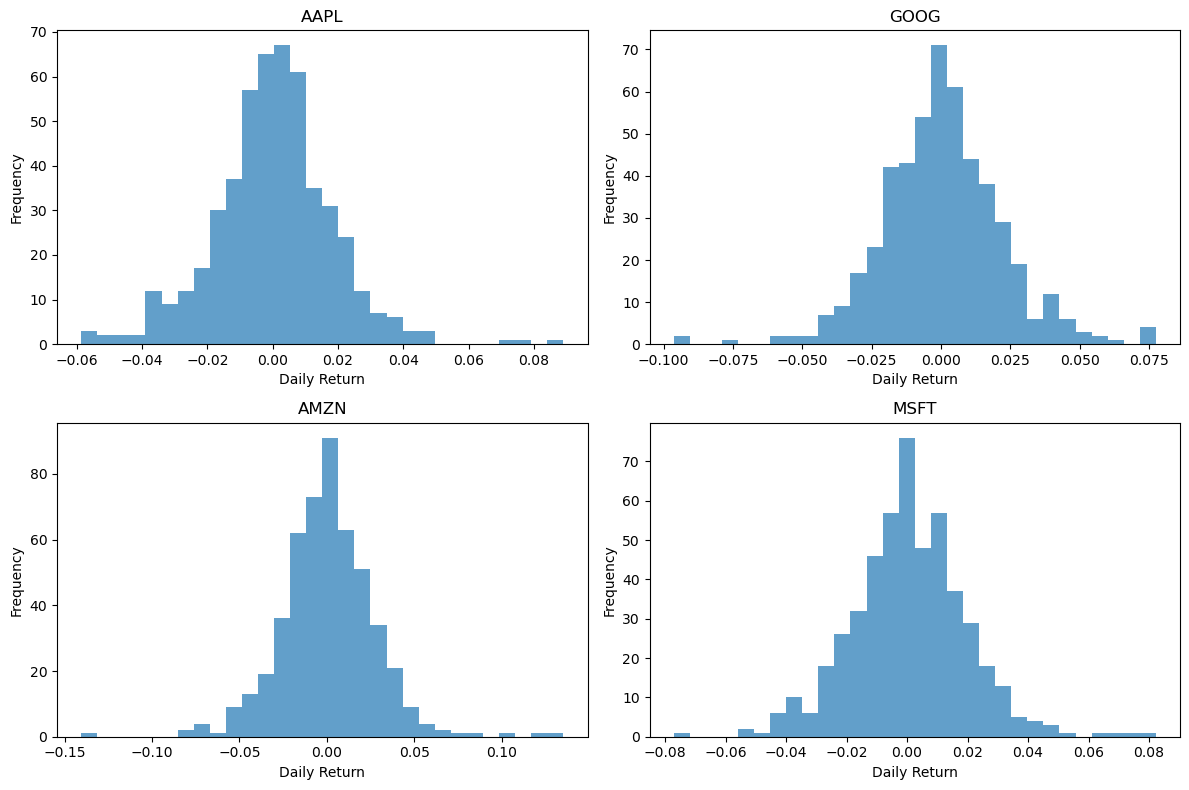

In [41]:
import matplotlib.pyplot as plt

# Assuming aapl_df, goog_df, amzn_df, and msft_df are the DataFrames containing 'Daily_Return'
# If needed, replace them with the actual DataFrame names

# Create a 2x2 matrix of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plotting histogram of daily returns for AAPL
aapl_df['Daily_Return'].plot.hist(bins=30, alpha=0.7, ax=axs[0, 0])
axs[0, 0].set_title('AAPL')
axs[0, 0].set_xlabel('Daily Return')
axs[0, 0].set_ylabel('Frequency')

# Plotting histogram of daily returns for GOOG
goog_df['Daily_Return'].plot.hist(bins=30, alpha=0.7, ax=axs[0, 1])
axs[0, 1].set_title('GOOG')
axs[0, 1].set_xlabel('Daily Return')
axs[0, 1].set_ylabel('Frequency')

# Plotting histogram of daily returns for AMZN
amzn_df['Daily_Return'].plot.hist(bins=30, alpha=0.7, ax=axs[1, 0])
axs[1, 0].set_title('AMZN')
axs[1, 0].set_xlabel('Daily Return')
axs[1, 0].set_ylabel('Frequency')

# Plotting histogram of daily returns for MSFT
msft_df['Daily_Return'].plot.hist(bins=30, alpha=0.7, ax=axs[1, 1])
axs[1, 1].set_title('MSFT')
axs[1, 1].set_xlabel('Daily Return')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [47]:
aapl_returns = aapl_df[['Daily_Return']].rename(columns={'Daily_Return': 'AAPL_Return'})
goog_returns = goog_df[['Daily_Return']].rename(columns={'Daily_Return': 'GOOG_Return'})
amzn_returns = amzn_df[['Daily_Return']].rename(columns={'Daily_Return': 'AMZN_Return'})
msft_returns = msft_df[['Daily_Return']].rename(columns={'Daily_Return': 'MSFT_Return'})

daily_returns_df = pd.concat([aapl_returns, goog_returns, amzn_returns, msft_returns], axis=1)

print(daily_returns_df.head())

aapl_volume = aapl_df[['Volume']].rename(columns={'Volume': 'AAPL_volume'})
goog_volume = goog_df[['Volume']].rename(columns={'Volume': 'GOOG_volume'})
amzn_volume = amzn_df[['Volume']].rename(columns={'Volume': 'AMZN_volume'})
msft_volume = msft_df[['Volume']].rename(columns={'Volume': 'MSFT_volume'})


volume_df = pd.concat([aapl_volume, goog_volume, amzn_volume, msft_volume], axis=1)

print(volume_df.head())

            AAPL_Return  GOOG_Return  AMZN_Return  MSFT_Return
Date                                                          
2022-01-18          NaN          NaN          NaN          NaN
2022-01-19    -0.021025    -0.004685    -0.016477     0.002247
2022-01-20    -0.010347    -0.015816    -0.029632    -0.005703
2022-01-21    -0.012765    -0.025576    -0.059502    -0.018468
2022-01-24    -0.004864     0.002152     0.013327     0.001149
            AAPL_volume  GOOG_volume  AMZN_volume  MSFT_volume
Date                                                          
2022-01-18     90956700     27382000     67292000     42333200
2022-01-19     94815000     20796000     53242000     45933900
2022-01-20     91420500     21930000     71974000     35380700
2022-01-21    122848900     41920000    163972000     57984400
2022-01-24    162294600     55148000    155624000     85731500


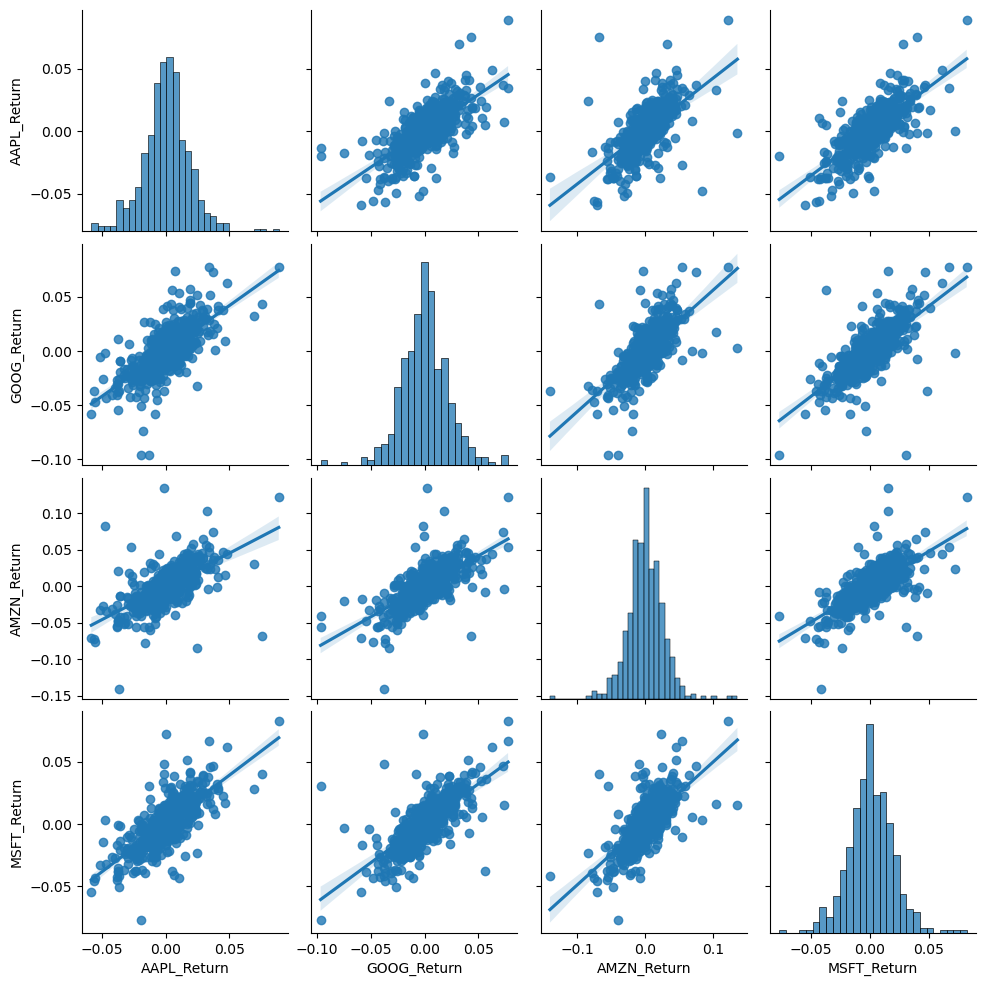

In [43]:
sns.pairplot(daily_returns_df, kind='reg')

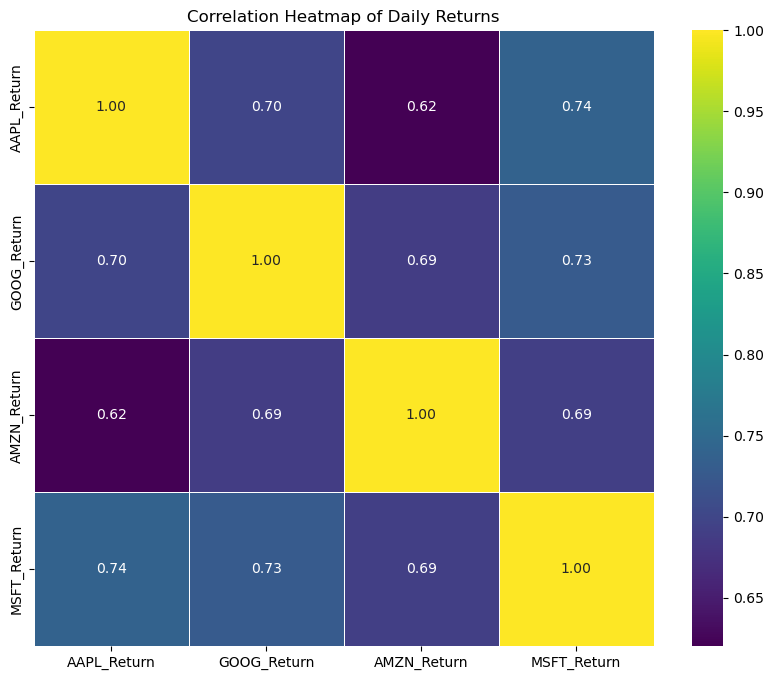

In [45]:
correlation_matrix = daily_returns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Daily Returns')
plt.show()


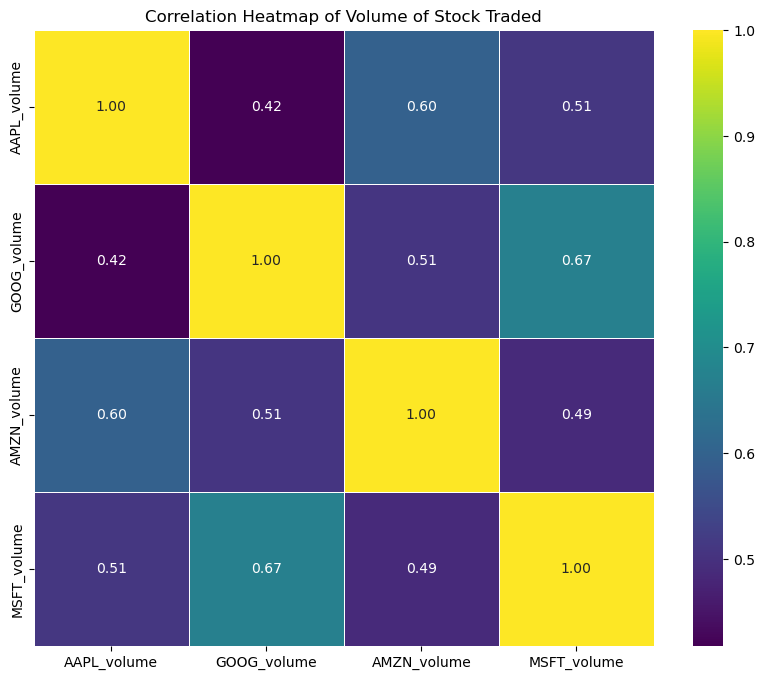

In [48]:
correlation_matrix = volume_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Volume of Stock Traded')
plt.show()

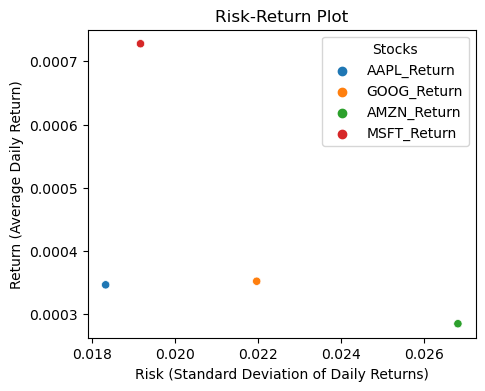

In [53]:
average_returns = daily_returns_df.mean()
risk = daily_returns_df.std()

# Create a scatter plot
plt.figure(figsize=(5, 4))
sns.scatterplot(x=risk, y=average_returns, hue=daily_returns_df.columns)
plt.title('Risk-Return Plot')
plt.xlabel('Risk (Standard Deviation of Daily Returns)')
plt.ylabel('Return (Average Daily Return)')
plt.legend(title='Stocks')
plt.show()